In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from cascading_failure.utils import *


### Prevention Mechanisms in the Simulations

In [4]:
filepath = "data/graph_ml_files/us_network.graphml" 
G = load_network(filepath)
simulation = initialize_simulation(G)

In [5]:
alpha_values = np.linspace(0, 0.6, 25)
prevention_mechanisms = ["None", "localized_capacity_boost", "dynamic_load_redistribution", "controlled_failure_isolation", "prevent_cascading_failure"]
num_simulations = 20

In [6]:
results = run_prevention_mechanism_simulations(simulation, alpha_values, prevention_mechanisms, num_simulations)

Running simulation 1/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 2/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 3/20
Simulating with prevention mechanism: None
Simulating with prevention mechanism: localized_capacity_boost
Simulating with prevention mechanism: dynamic_load_redistribution
Simulating with prevention mechanism: controlled_failure_isolation
Simulating with prevention mechanism: prevent_cascading_failure
Running simulation 

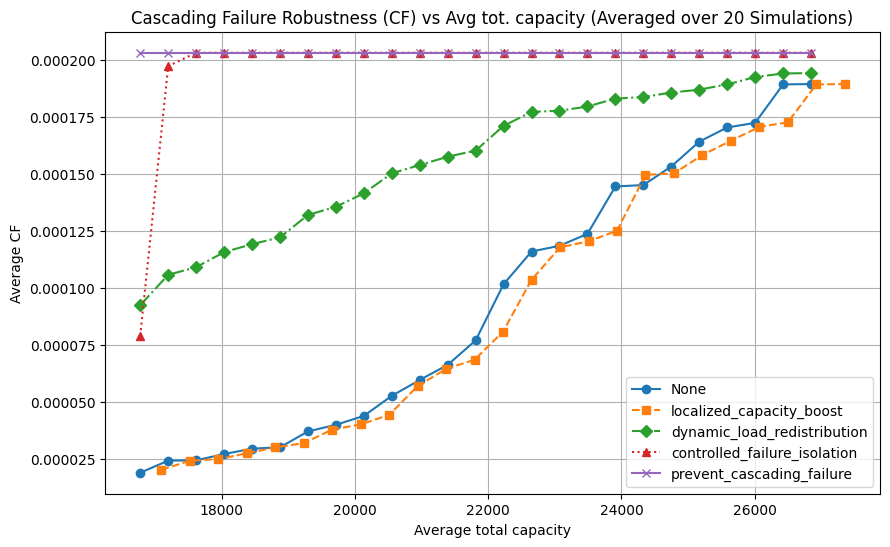

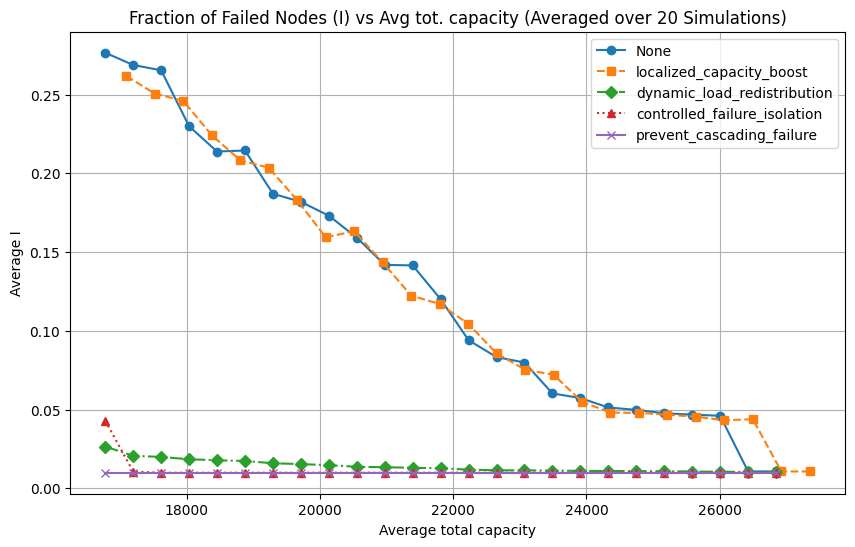

In [7]:
plot_prevention_mechanism_results(results, alpha_values, prevention_mechanisms, num_simulations, True)

In [8]:
save_prevention_results_to_csv(results, alpha_values, num_simulations, "results/csv/prevention_mechanism_results.csv")

Results saved to results/csv/prevention_mechanism_results.csv


Currently at 0.0%
Currently at 10.0%
Currently at 20.0%
Currently at 30.0%
Currently at 40.0%
Currently at 50.0%
Currently at 60.0%
Currently at 70.0%
Currently at 80.0%
Currently at 90.0%


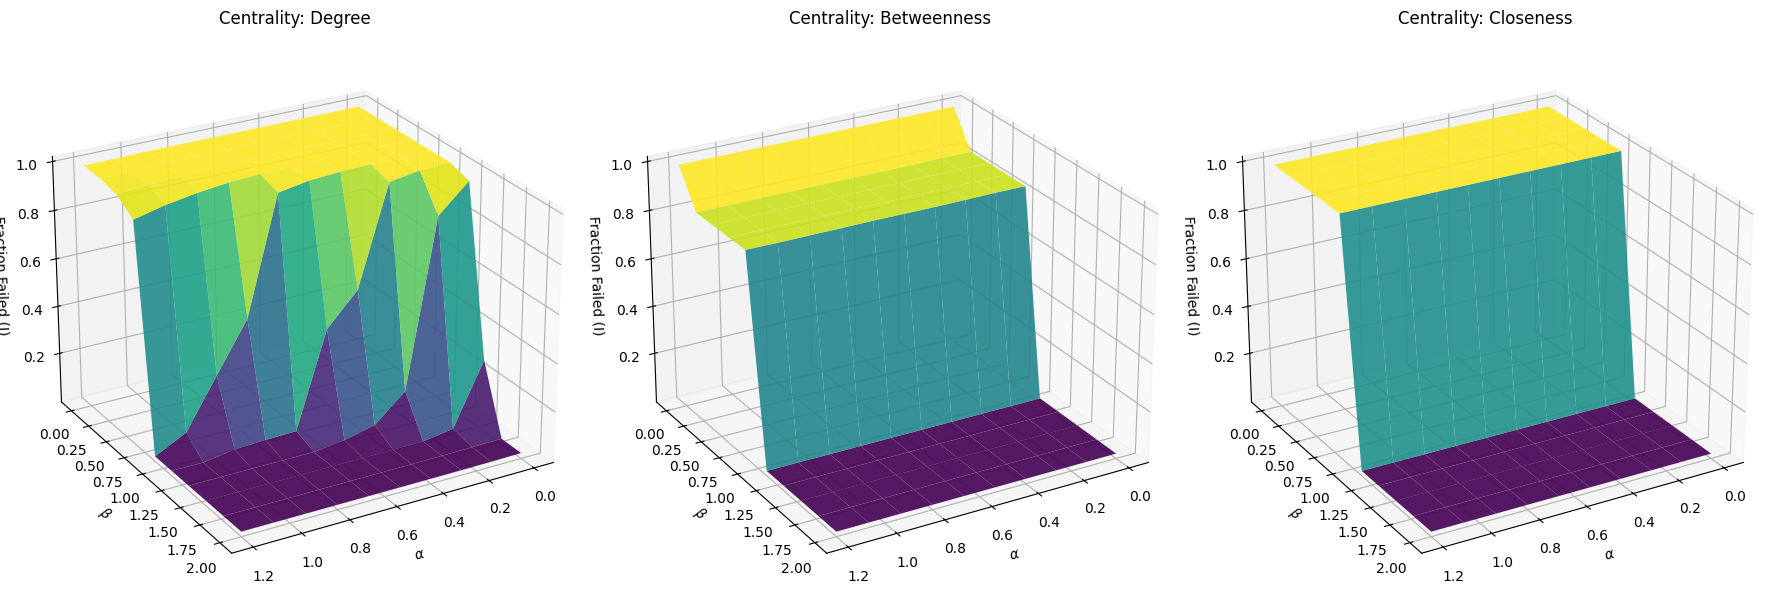

In [9]:
G3 = load_network(filepath)
mapping3 = {node: int(node) for node in G3.nodes()}
G3 = nx.relabel_nodes(G3, mapping3)

alpha_vals = np.linspace(0, 1.2, 10)
beta_vals = np.linspace(0, 2.0, 10)
centrality_types = ["degree", "betweenness", "closeness"]

results_us_3D = simulate_and_average_3D(G3, alpha_vals, beta_vals, centrality_types, num_simulations=25)

fig = plt.figure(figsize=(18, 6))
A, B = np.meshgrid(alpha_vals, beta_vals) 

for idx, cent in enumerate(centrality_types, start=1):
    ax = fig.add_subplot(1, 3, idx, projection='3d')
    Z = results_us_3D[cent]  

    surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.set_title(f"Centrality: {cent.capitalize()}")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\beta$")
    ax.set_zlabel("Fraction Failed (I)")
    ax.view_init(elev=25, azim=60)

plt.tight_layout()
plt.savefig("us_network_3D_results.png")
plt.show()

# Optional: Save results to CSV and save png of 3D plot
# save_results_3D_to_csv(results_us_3D, alpha_vals, beta_vals, "us_network_3D_results.csv")

In [10]:
filepath = "data/graph_ml_files/toy_network_undirected.graphml"
G = nx.read_graphml(filepath)
mapping = {node: int(node) for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)

In [11]:
filepath = "data/graph_ml_files/iceland.graphml"
G2 = load_network(filepath)

In [12]:
toy_capacity_list = np.linspace(61,110,40)
iceland_capacity_list = np.linspace(407,600,40)
us_capacity_list = np.linspace(13200, 30000, 10)
centrality_types = ["degree", "betweenness", "closeness"]

1: The node 0 has the centrality of 0
sum capacity before scaling: 60.0
sum capacity after scaling: 60.99999999999997
total_capacity: 61.0
sum capacity before scaling: 60.0
sum capacity after scaling: 62.256410256410255
total_capacity: 62.256410256410255
sum capacity before scaling: 60.0
sum capacity after scaling: 63.51282051282053
total_capacity: 63.51282051282051
sum capacity before scaling: 60.0
sum capacity after scaling: 64.76923076923079
total_capacity: 64.76923076923077
sum capacity before scaling: 60.0
sum capacity after scaling: 66.02564102564101
total_capacity: 66.02564102564102
sum capacity before scaling: 60.0
sum capacity after scaling: 67.28205128205128
total_capacity: 67.28205128205128
sum capacity before scaling: 60.0
sum capacity after scaling: 68.53846153846153
total_capacity: 68.53846153846153
sum capacity before scaling: 60.0
sum capacity after scaling: 69.7948717948718
total_capacity: 69.7948717948718
sum capacity before scaling: 60.0
sum capacity after scaling: 7

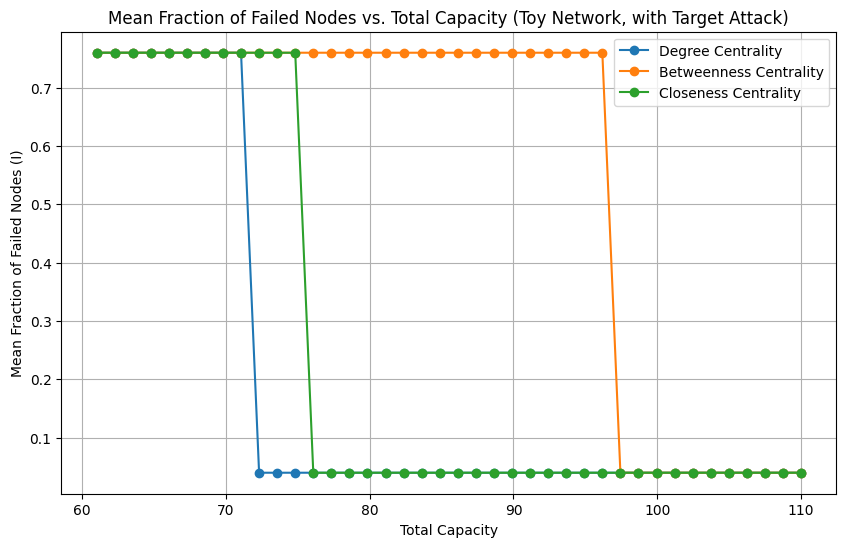

In [13]:
toy_results = simulate_and_average_capacity(G, centrality_types, capacity_list=toy_capacity_list, target_attack=True)
plot_attack_graphs(toy_results, network_type="Toy Network, with Target Attack", capacity_list=toy_capacity_list, file_name="toy_capacity_target")
save_attack_results_to_csv(toy_results, fr"toy_capacity_target.csv", capacity_list=toy_capacity_list)


1: The node 1 has the centrality of 0
sum capacity before scaling: 406.0
sum capacity after scaling: 407.0000000000005
total_capacity: 407.0
sum capacity before scaling: 406.0
sum capacity after scaling: 411.94871794871824
total_capacity: 411.94871794871796
sum capacity before scaling: 406.0
sum capacity after scaling: 416.8974358974368
total_capacity: 416.8974358974359
sum capacity before scaling: 406.0
sum capacity after scaling: 421.84615384615336
total_capacity: 421.84615384615387
sum capacity before scaling: 406.0
sum capacity after scaling: 426.7948717948717
total_capacity: 426.7948717948718
sum capacity before scaling: 406.0
sum capacity after scaling: 431.7435897435911
total_capacity: 431.7435897435897
sum capacity before scaling: 406.0
sum capacity after scaling: 436.6923076923077
total_capacity: 436.6923076923077
sum capacity before scaling: 406.0
sum capacity after scaling: 441.64102564102694
total_capacity: 441.64102564102564
sum capacity before scaling: 406.0
sum capacity 

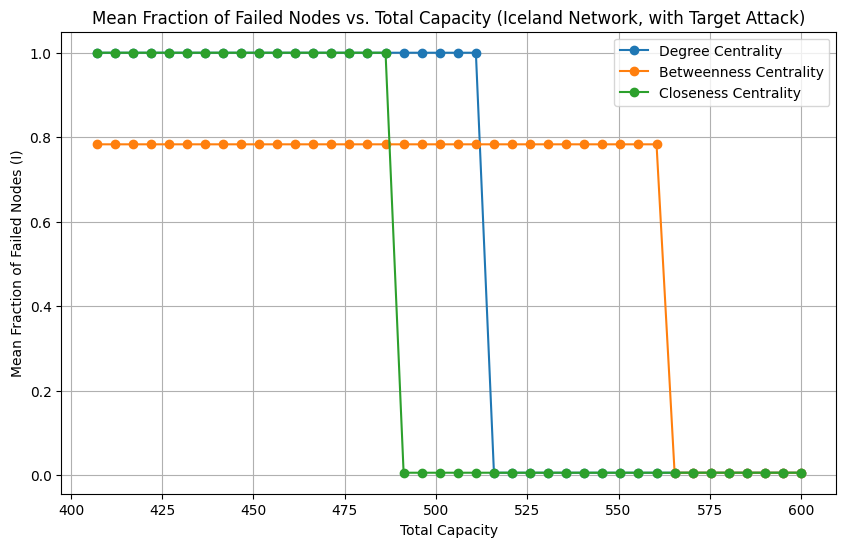

In [14]:
iceland_results = simulate_and_average_capacity(G2, centrality_types, capacity_list=iceland_capacity_list, target_attack=True)
plot_attack_graphs(iceland_results, network_type="Iceland Network, with Target Attack", capacity_list=iceland_capacity_list, file_name="iceland_capacity_target")
save_attack_results_to_csv(iceland_results, fr"iceland_capacity_target.csv", capacity_list=iceland_capacity_list)


### Random vs Target Attacks

In [15]:
BA_ran = pd.read_csv("results/csv/BA_network_results_beta_ran.csv")
BA_tar = pd.read_csv("results/csv/BA_network_results_beta_tar.csv")
US_ran = pd.read_csv("results/csv/US_network_results_beta_ran.csv")
US_tar = pd.read_csv("results/csv/US_network_results_beta_tar.csv")

In [16]:
alpha = BA_ran["Alpha"]
BA_ran_mean = BA_ran ["degree_mean"]
BA_tar_mean = BA_tar ["degree_mean"]
US_ran_mean = US_ran["degree_mean"]
US_tar_mean = US_tar["degree_mean"]

BA_ran_std = BA_ran ["degree_std"]
US_ran_std = US_ran["degree_std"]

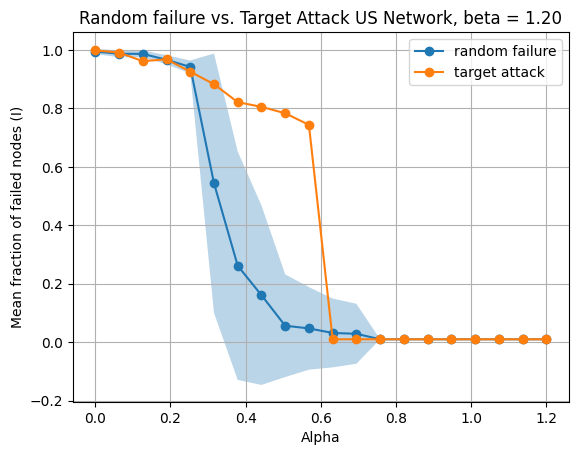

In [17]:
plt.plot(alpha, US_ran_mean, label="random failure", marker='o')
plt.fill_between(alpha, US_ran_mean - US_ran_std, US_ran_mean + US_ran_std, alpha=0.3)
plt.plot(alpha, US_tar_mean, label="target attack", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean fraction of failed nodes (I)")
plt.title("Random failure vs. Target Attack US Network, beta = 1.20")
plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


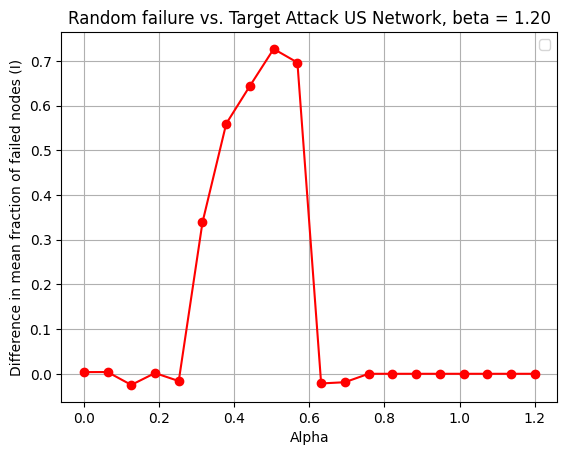

In [18]:
US_dif = US_tar_mean - US_ran_mean
plt.plot(alpha, US_dif, color = "red", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Difference in mean fraction of failed nodes (I)")
plt.title("Random failure vs. Target Attack US Network, beta = 1.20")
plt.grid()
plt.legend()
plt.show()

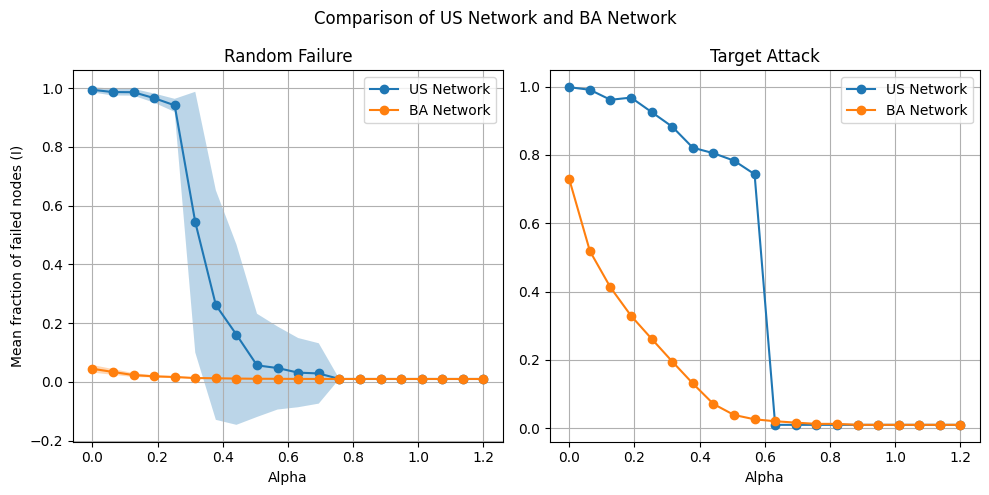

In [19]:
# plot the figures to compare the random failure and targeted attack on iceland network
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Degree Centrality Plot
axes[0].plot(alpha, US_ran_mean, label="US Network", marker='o')
axes[0].fill_between(alpha, US_ran_mean - US_ran_std, US_ran_mean + US_ran_std, alpha=0.3)
axes[0].plot(alpha, BA_ran_mean, label="BA Network", marker='o')
axes[0].fill_between(alpha, BA_ran_mean - BA_ran_std, BA_ran_mean + BA_ran_std, alpha=0.3)
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("Mean fraction of failed nodes (I)")
axes[0].set_title("Random Failure")
axes[0].grid()
axes[0].legend()

# Betweenness Centrality Plot
axes[1].plot(alpha, US_tar_mean, label="US Network", marker='o')
axes[1].plot(alpha, BA_tar_mean, label="BA Network", marker='o')
axes[1].set_xlabel("Alpha")
axes[1].set_title("Target Attack")
axes[1].grid()
axes[1].legend()


fig.suptitle("Comparison of US Network and BA Network")
plt.tight_layout()
plt.show()